In [1]:
import pandas as pd

# Load your dataset
data = pd.read_excel('merged_data.xlsx')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove rows with missing values
data_cleaned = data.dropna()

# Optional: Reset index after removing rows
data_cleaned.reset_index(drop=True, inplace=True)

# Optional: Check the shape of the cleaned data
print("Shape of cleaned data:", data_cleaned.shape)

# Optional: Save the cleaned data to a new Excel file if needed
data_cleaned.to_excel('cleaned_merged_data.xlsx', index=False)


Missing Values:
 REF_DATE                                                     0
GEO                                                          0
DGUID                                                        0
North American Industry Classification System (NAICS)        0
Seasonally Adjusted                                      39129
Unadjusted                                                   0
dtype: int64
Shape of cleaned data: (3899, 6)


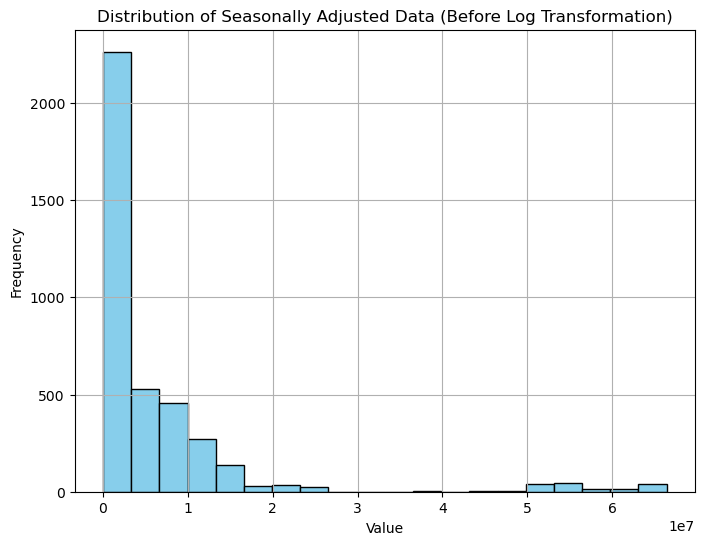

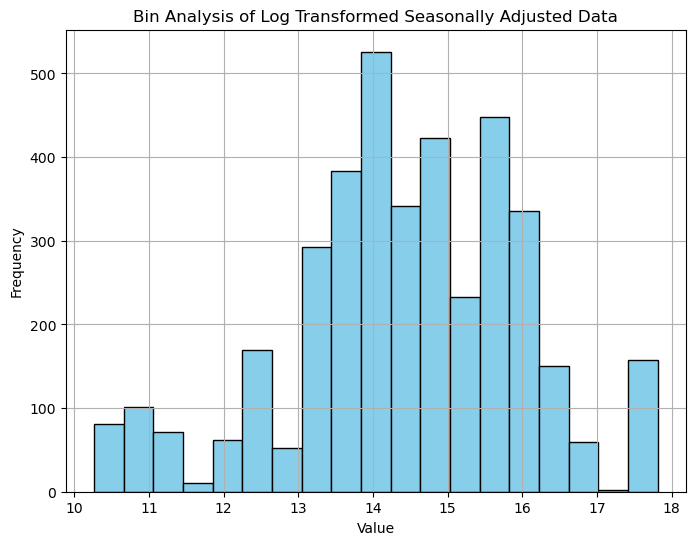

Summary Statistics Before Log Transformation:
count    3.899000e+03
mean     6.408114e+06
std      1.152634e+07
min      3.495800e+04
25%      1.001902e+06
50%      2.224585e+06
75%      7.471954e+06
max      6.637825e+07
Name: Seasonally Adjusted, dtype: float64
Skewness Before Log Transformation: 3.6332539902380168

Summary Statistics After Log Transformation:
count    3.899000e+03
mean     6.408114e+06
std      1.152634e+07
min      3.495800e+04
25%      1.001901e+06
50%      2.224585e+06
75%      7.471953e+06
max      6.637825e+07
Name: Imputed_Seasonally_Adjusted, dtype: float64
Skewness After Log Transformation: 3.6332539902380176


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('cleaned_merged_data.xlsx')


# Calculate summary statistics before log transformation
before_log_stats = data['Seasonally Adjusted'].describe()
skewness_before_log = data['Seasonally Adjusted'].skew()

# Visualize the distribution before log transformation
plt.figure(figsize=(8, 6))
plt.hist(data['Seasonally Adjusted'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Seasonally Adjusted Data (Before Log Transformation)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Apply log transformation to the 'Seasonally Adjusted' column
data['Log_Seasonally_Adjusted'] = np.log1p(data['Seasonally Adjusted'])

# Perform bin analysis on the log-transformed data
bins = np.linspace(data['Log_Seasonally_Adjusted'].min(), data['Log_Seasonally_Adjusted'].max(), 20)
bin_counts, bin_edges = np.histogram(data['Log_Seasonally_Adjusted'], bins=bins)

# Visualize the bin analysis
plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), color='skyblue', edgecolor='black')
plt.title('Bin Analysis of Log Transformed Seasonally Adjusted Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Fill missing values in the log-transformed column with the median
log_median = data['Log_Seasonally_Adjusted'].median()
data['Log_Seasonally_Adjusted'].fillna(log_median, inplace=True)

# Perform inverse transformation to get back to the original scale
data['Imputed_Seasonally_Adjusted'] = np.expm1(data['Log_Seasonally_Adjusted'])

# Create a new feature for the difference between adjusted and unadjusted sales
data['Adjusted_Unadjusted_Difference'] = data['Imputed_Seasonally_Adjusted'] - data['Unadjusted']

# Create a new feature for the ratio of adjusted to unadjusted sales
data['Adjusted_Unadjusted_Ratio'] = data['Imputed_Seasonally_Adjusted'] / data['Unadjusted']

# Calculate summary statistics after log transformation
after_log_stats = data['Imputed_Seasonally_Adjusted'].describe()
skewness_after_log = data['Imputed_Seasonally_Adjusted'].skew()

# Print summary statistics and skewness before and after log transformation
print("Summary Statistics Before Log Transformation:")
print(before_log_stats)
print("Skewness Before Log Transformation:", skewness_before_log)
print("\nSummary Statistics After Log Transformation:")
print(after_log_stats)
print("Skewness After Log Transformation:", skewness_after_log)

# Save the modified dataset to a new Excel file
data.to_excel('modified_data_with_imputation_and_log_edited.xlsx', index=False)